In [1]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'
%config IPCompleter.greedy=True

In [9]:
import sys
import os
import pandas as pd
import numpy as np
# import pandas_profiling
import json
import math
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',1000)
import sklearn
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split 
from collections import Counter
from pandas.api.types import is_dict_like
import itertools
import time
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
sys.path.append('/Users/yantingting/PycharmProjects/modeling')
import data_processing as dp

In [2]:
file_path= '/Users/yantingting/Documents/海外风控/巴西/'
file_path_out = '/Users/yantingting/Documents/海外风控/巴西/Brazil_中间结果/'

# 巴西银行数据
不是所有的样本都用来进行分析，取消的订单不作为样本

In [11]:
bank_data = pd.read_csv(file_path_out + 'bank_data.csv')
bank_data['week'] = bank_data['DATE'].apply(lambda x: datetime.datetime.strptime(str(x),'%Y%m%d').strftime('%W'))
bank_data.groupby['week']['DATE'].min()
bank_data.shape
bank_data.head()


(38676, 50)

,Unnamed: 0,DATE,loan_id,BIRTH DATE (CLIENT INFORM),MARITIAL STATUS,EDUCATION DEGREE,STREET NAME,HOUSE NUMBER,ZIP CODE,STATE NAME,CITY NAME,INCOME,OCCUPATION,GENDER,EMAIL,BANK NUMBER,BANK BRANCHE,BANK NUMBER.1,BANK NAME,SERASA SCORE,BOA VISTA (BVS) SCORE,INTERNAL SCORE,RISK RANGE,IRS STATUS,SERASA NEGATIVE FLAG,BIRTH DATE (BUREAU SOURCE),ADDRESS (BUREAU SOURCE),NATIONALITY,NEW CLIENT,INTEREST RATE (monthly),INSURANCE TYPE,INSURANCE COVER VALUE,NOTARYS OFFICE PROTEST FLAG,REATIL DEBT DELAY FLAG,BANK DEBT DELAY FLAG,LAWSUIT FLAG,BOUNCED CHECK FLAG,STOLEN DOCUMENTS FLAG,ACTIVE COMPANIES ON HIS NAME,SOCIETARY PARTICIPATION STATUS,CDL NEGATIVE FLAG,LOAN AMOUNT (CONTRACT),LOAN TENOR (CONTRACT),MONTHLY PAYMENT (CONTRACT),NOTARYS OFFICE PROTEST AMOUNT,BANK DEBT DELAY AMOUNT,LOAN CONTRACT STATUS,flag,flag_result,week
0,0,20191014,3808870852,19/07/1965,O,0,NaN,NaN,59215000.0,NaN,NaN,1032.0,Assalariados,M,redmilson970@gmail.com,NaN,NaN,NaN,NaN,NaN,623.0,NaN,FAIXA_12,FALHA,APROVA,19/07/1965,R SEN GEORGINO AVELINO 728,0.0,CLIENTE NOVO,9.96,C,41.94,NAO_CONSTAM_OCORRENCIAS,NAO_CONSTAM_OCORRENCIAS,NAO_CONSTAM_OCORRENCIAS,NAO_CONSTAM_OCORRENCIAS,NAO_CONSTAM_OCORRENCIAS,NAO_CONSTAM_OCORRENCIAS,0.0,NaN,APROVA,576.09,15.0,94.51,0.0,0.0,COMPLEMENTAR CADASTRO,INCOMPLETE APPLICATION,1,41
1,1,20191015,3808871384,19/10/1969,O,0,NaN,NaN,14140000.0,NaN,NaN,2040.0,Assalariados,M,jaquelinexjoaomiguel@gmail.com,NaN,NaN,NaN,NaN,NaN,489.0,NaN,FAIXA_13,FALHA,APROVA,19/10/1969,GREGORIO PELEGI 267 C,0.0,CLIENTE NOVO,9.96,C,82.20,NAO_CONSTAM_OCORRENCIAS,NAO_CONSTAM_OCORRENCIAS,NAO_CONSTAM_OCORRENCIAS,NAO_CONSTAM_OCORRENCIAS,NAO_CONSTAM_OCORRENCIAS,NAO_CONSTAM_OCORRENCIAS,0.0,NaN,APROVA,1129.09,15.0,184.66,0.0,0.0,COMPLEMENTAR CADASTRO,INCOMPLETE APPLICATION,1,41
2,2,20191017,3808917409,11/04/1987,O,0,NaN,NaN,9250590.0,NaN,NaN,2800.0,Funcionários Públicos,F,jssacostajesus@hotmail.com,NaN,NaN,NaN,NaN,NaN,693.0,NaN,FAIXA_11,FALHA,APROVA,11/04/1987,R JAPAO 91,0.0,CLIENTE NOVO,9.96,C,91.76,NAO_CONSTAM_OCORRENCIAS,NAO_CONSTAM_OCORRENCIAS,NAO_CONSTAM_OCORRENCIAS,NAO_CONSTAM_OCORRENCIAS,NAO_CONSTAM_OCORRENCIAS,NAO_CONSTAM_OCORRENCIAS,0.0,NaN,APROVA,1260.49,15.0,203.59,0.0,0.0,COMPLEMENTAR CADASTRO,INCOMPLETE APPLICATION,1,41
3,3,20191018,3808927120,15/08/1990,O,0,NaN,NaN,30210130.0,NaN,NaN,6985.0,Assalariados,M,henriquemelocarvalho84@gmail.com,NaN,NaN,NaN,NaN,624.0,NaN,NaN,FAIXA_12,FALHA,APROVA,15/08/1990,R MANUEL TEIXEIRA DE SALES 170,0.0,CLIENTE NOVO,10.41,C,182.00,NAO_CONSTAM_OCORRENCIAS,NAO_CONSTAM_OCORRENCIAS,NAO_CONSTAM_OCORRENCIAS,NAO_CONSTAM_OCORRENCIAS,NAO_CONSTAM_OCORRENCIAS,NAO_CONSTAM_OCORRENCIAS,0.0,NaN,APROVA,2500.00,10.0,502.68,0.0,0.0,COMPLEMENTAR CADASTRO,INCOMPLETE APPLICATION,1,41
4,4,20191018,3808927373,02/08/1982,C,6,RUA NELSON NOBRE,360,26900000.0,RJ,MIGUEL PEREIRA,3000.0,Assalariados,M,uilian_mp@hotmail.com,1.0,73.0,00755826,BANCO DO BRASIL SA,NaN,553.0,NaN,FAIXA_12,FALHA,APROVA,02/08/1982,R NELSON NOBRE 360 C,1.0,CLIENTE NOVO,9.96,C,116.77,NAO_CONSTAM_OCORRENCIAS,NAO_CONSTAM_OCORRENCIAS,NAO_CONSTAM_OCORRENCIAS,NAO_CONSTAM_OCORRENCIAS,NAO_CONSTAM_OCORRENCIAS,NAO_CONSTAM_OCORRENCIAS,0.0,NaN,APROVA,1603.92,15.0,259.06,0.0,0.0,COMPLEMENTAR CADASTRO,INCOMPLETE APPLICATION,1,41


In [18]:
bank_data.groupby['week']['DATE']

TypeError: 'method' object is not subscriptable

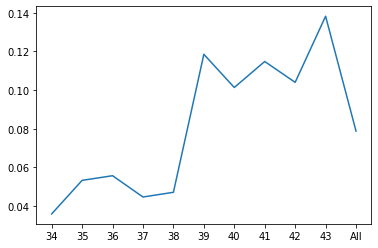

In [15]:
frame1 = pd.crosstab(bank_data['week'], bank_data['flag_result'], margins=True).reset_index()
frame1['rate'] = frame1[1]/frame1['All']
plt.plot(frame1['week'], frame1['rate'])
plt.show()

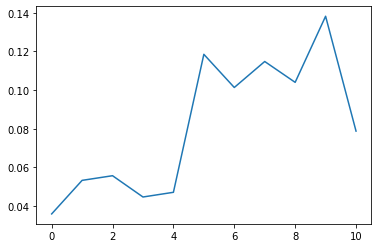

In [16]:
plt.plot( frame1['rate'])
plt.show()

银行数据生成变量（未处理）

In [7]:
import  sklearn
from sklearn import tree#输出决策树

x=[[0,0],[2,2]]
y=[0,1]
clf=tree.DecisionTreeClassifier()#这是用于进行分类问题
clf=clf.fit(x,y)
print (clf.predict_proba([[1,1]]))
print (clf.apply(x))  #返回叶节点所在位置的索引
print (clf.predict([[3,4]]))

x=[[0,0],[2,2]]
y=[0.5,2.5]#注意这时候标签是浮点类型的，且是不连续的
clf=tree.DecisionTreeRegressor()#就要用到回归决策树分类器
clf=clf.fit(x,y)
#print (clf.predict_proba([[1,1]]))
#print (clf.apply(x))  返回叶节点所在位置的索引
print (clf.predict([[3,4]]))

[[1. 0.]]
[1 2]
[1]
[2.5]


In [ ]:
import  sklearn
from sklearn.tree import DecisionTreeRegressor#输出回归决策树
import numpy as np
import matplotlib.pyplot  as plt

rng=np.random.RandomState(1)#其中1为伪随机种子。只要随机种子一样，那么生成的序列就相同
x=np.sort(5*rng.rand(80,1),axis=0)#其中random.rand 的用处是生成一个指定形状的数组，np.sort 参数axis默认为-1，表示按照最后一行排序
#print (x)  最终生成了一组80个由小到大排列的数
"""
>>> a = np.array([[1,4],[3,1]])
>>> np.sort(a)                # sort along the last axis
array([[1, 4],
       [1, 3]])
>>> np.sort(a, axis=None)     # sort the flattened array
array([1, 1, 3, 4])
>>> np.sort(a, axis=0)        # sort along the first axis
array([[1, 1],
       [3, 4]])
"""
y=np.sin(x).ravel()#np.sin(np.pi/2)得到[[1]],ravel的作用是降维的作用
y[::5]+=3*(0.5-rng.rand(16))# 80/5=16 利用rand 产生16个一维数组
# #print (y)
regr_1=DecisionTreeRegressor(max_depth=2)
regr_2=DecisionTreeRegressor(max_depth=5)#产生两个深度不同的树
regr_1.fit(x,y)
regr_2.fit(x,y)#分别训练两棵树


#ppredict
x_test=np.arange(0.0,5.0,0.01)[:,np.newaxis]#将1行多列的数组转化为多行一列的数组
y_1=regr_1.predict(x_test)
y_2=regr_2.predict(x_test)

#picture
plt.figure()#画布搭建
plt.scatter(x,y, s=20,marker='<',edgecolor='black',c='darkorange',label='data')
"""
其中的s可以理解为点的大小，c为颜色序列,当有多个点的时候，可以接受一个颜色组成的列表，每个点的颜色按照序列颜色生成
marker 表示生成的点的形状，默认为'o'
label 图像标签
"""
plt.plot(x_test, y_1, color="cornflowerblue",label="max_depth=2", linewidth=2)
plt.plot(x_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()